In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
H001_gabor = pd.read_csv("../data/behavioural/H001_gabor.csv")
H002_gabor = pd.read_csv("../data/behavioural/H002_gabor.csv")
H003_gabor = pd.read_csv("../data/behavioural/H003_gabor.csv")
H004_gabor = pd.read_csv("../data/behavioural/H004_gabor.csv")
H005_gabor = pd.read_csv("../data/behavioural/H005_gabor.csv")
H001_faces = pd.read_csv("../data/behavioural/H001_faces.csv")
H002_faces = pd.read_csv("../data/behavioural/H002_faces.csv")
H003_faces = pd.read_csv("../data/behavioural/H003_faces.csv")
H004_faces = pd.read_csv("../data/behavioural/H004_faces.csv")
H005_faces = pd.read_csv("../data/behavioural/H005_faces.csv")
H001_dots = pd.read_csv("../data/behavioural/H001_dots.csv")
H002_dots = pd.read_csv("../data/behavioural/H002_dots.csv")
H003_dots = pd.read_csv("../data/behavioural/H003_dots.csv")
H005_dots = pd.read_csv("../data/behavioural/H005_dots.csv")
H001_faces.Contrast = H001_faces.Contrast > 8
H002_faces.Contrast = H002_faces.Contrast > 8
H003_faces.Contrast = H003_faces.Contrast > 8
H004_faces.Contrast = H004_faces.Contrast > 8
H005_faces.Contrast = H005_faces.Contrast > 8

## Gabor Patches

### Significance Testing

H001

In [3]:
chance = np.concatenate((np.zeros(math.floor(len(H001_gabor.Correct)/2)),np.ones(math.ceil(len(H001_gabor.Correct)/2))))

stat, p = wilcoxon(H001_gabor.Correct, chance)
print(stat, p)

40.5 8.76994237559024e-05


H002

In [4]:
chance = np.concatenate((np.zeros(math.floor(len(H002_gabor.Correct)/2)),np.ones(math.ceil(len(H002_gabor.Correct)/2))))

stat, p = wilcoxon(H002_gabor.Correct, chance)
print(stat, p)

120.0 0.5316145768816123


H003

In [5]:
chance = np.concatenate((np.zeros(math.floor(len(H003_gabor.Correct)/2)),np.ones(math.ceil(len(H003_gabor.Correct)/2))))

stat, p = wilcoxon(H003_gabor.Correct, chance)
print(stat, p)

112.5 0.22067136191984693


H004

In [6]:
chance = np.concatenate((np.zeros(math.floor(len(H004_gabor.Correct)/2)),np.ones(math.ceil(len(H004_gabor.Correct)/2))))

stat, p = wilcoxon(H004_gabor.Correct, chance)
print(stat, p)

195.0 0.5774686624272996


H005

In [7]:
chance = np.concatenate((np.zeros(math.floor(len(H005_gabor.Correct)/2)),np.ones(math.ceil(len(H005_gabor.Correct)/2))))

stat, p = wilcoxon(H005_gabor.Correct, chance)
print(stat, p)

143.0 0.5485062355001472


### Plots

In [8]:
gabor = []
for x in H001_gabor.Contrast.unique():
    l = ["H001",x,100*np.mean(H001_gabor.Correct[H001_gabor.Contrast==x]),0]
    gabor.append(l)
    gabor.append(["H001",x,100*np.mean(H001_gabor.Correct),1])
    
for x in H002_gabor.Contrast.unique():
    l = ["H002",x,100*np.mean(H002_gabor.Correct[H002_gabor.Contrast==x]),0]
    gabor.append(l)
    gabor.append(["H002",x,100*np.mean(H002_gabor.Correct),1])

for x in H003_gabor.Contrast.unique():
    l = ["H003",x,100*np.mean(H003_gabor.Correct[H003_gabor.Contrast==x]),0]
    gabor.append(l)
    gabor.append(["H003",x,100*np.mean(H003_gabor.Correct),1])
    
for x in H004_gabor.Contrast.unique():
    l = ["H004",x,100*np.mean(H004_gabor.Correct[H004_gabor.Contrast==x]),0]
    gabor.append(l)
    gabor.append(["H004",x,100*np.mean(H004_gabor.Correct),1])
    
for x in H005_gabor.Contrast.unique():
    l = ["H005",x,100*np.mean(H005_gabor.Correct[H005_gabor.Contrast==x]),0]
    gabor.append(l)
    gabor.append(["H005",x,100*np.mean(H005_gabor.Correct),1])

    
gabor_data = pd.DataFrame(gabor, columns=["Subject","Contrast (%)","Correct (%)","Average"])

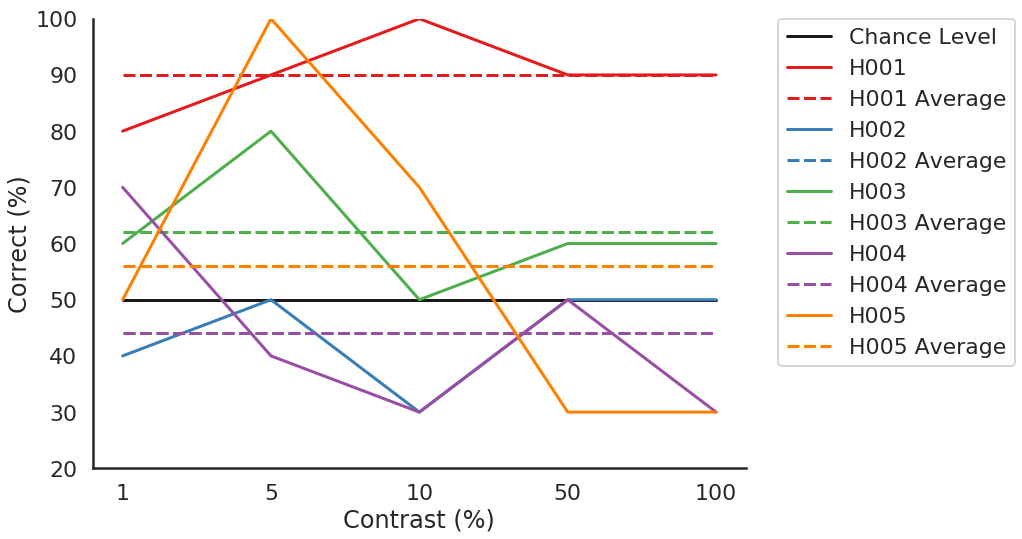

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

sns.set_context('poster')
sns.lineplot([1,2,3,4,5],[50,50,50,50,50],color='k',ci=100)

a = sns.lineplot(x='Contrast (%)', y='Correct (%)', hue='Subject', style="Average", data=gabor_data, legend=False, palette=sns.color_palette('Set1',n_colors=5));
sns.despine(top=True)
a.set_xticks([1,2,3,4,5])
a.set_xticklabels(["1","5","10","50","100"])
a.set_ylim([20,100])
plt.legend(["Chance Level","H001","H001 Average","H002","H002 Average","H003","H003 Average", "H004", "H004 Average","H005", "H005 Average"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
x = a.get_figure()
#plt.savefig("../plots/behaviour_gabor.jpg",bbox_inches='tight')

### Awareness

In [10]:
print("H001 Mean Awareness:", 100*H001_gabor.Awareness.mean())
print("H002 Mean Awareness:", 100*H002_gabor.Awareness.mean())
print("H003 Mean Awareness:", 100*H003_gabor.Awareness.mean())
print("H004 Mean Awareness:", 100*H004_gabor.Awareness.mean())
print("H005 Mean Awareness:", 100*H005_gabor.Awareness.mean())

H001 Mean Awareness: 80.0
H002 Mean Awareness: 8.0
H003 Mean Awareness: 34.0
H004 Mean Awareness: 0.0
H005 Mean Awareness: 0.0


## Moving Dots

### Significance Testing

H001

In [11]:
chance = np.concatenate((np.zeros(math.floor(len(H001_dots.Correct)/2)),np.ones(math.ceil(len(H001_dots.Correct)/2))))

stat, p = wilcoxon(H001_dots.Correct, chance)
print(stat, p)

336.0 2.9145891675051222e-05


H002

In [12]:
chance = np.concatenate((np.zeros(math.floor(len(H002_dots.Correct)/2)),np.ones(math.ceil(len(H002_dots.Correct)/2))))

stat, p = wilcoxon(H002_dots.Correct, chance)
print(stat, p)

272.0 0.8618044330490108


H003

In [13]:
chance = np.concatenate((np.zeros(math.floor(len(H003_dots.Correct)/2)),np.ones(math.ceil(len(H003_dots.Correct)/2))))

stat, p = wilcoxon(H003_dots.Correct, chance)
print(stat, p)

870.0 0.8964169676673134


No data was collected for H004

H005

In [14]:
chance = np.concatenate((np.zeros(math.floor(len(H005_dots.Correct)/2)),np.ones(math.ceil(len(H005_dots.Correct)/2))))

stat, p = wilcoxon(H005_dots.Correct, chance)
print(stat, p)

502.5 9.366941365702129e-06


### Plots

In [15]:
coherence = [0,12.5,25,50,75,100]
dots = []
for x in H001_dots.Contrast.unique():
    l = ["H001",coherence[x-1],100*np.mean(H001_dots.Correct[H001_dots.Contrast==x]),0]
    dots.append(l)
    dots.append(["H001",coherence[x-1],100*np.mean(H001_dots.Correct),1])
    
for x in H002_dots.Contrast.unique():
    l = ["H002",coherence[x-1],100*np.mean(H002_dots.Correct[H002_dots.Contrast==x]),0]
    dots.append(l)
    dots.append(["H002",coherence[x-1],100*np.mean(H002_dots.Correct),1])

for x in H003_dots.Contrast.unique():
    l = ["H003",coherence[x-1],100*np.mean(H003_dots.Correct[H003_dots.Contrast==x]),0]
    dots.append(l)
    dots.append(["H003",coherence[x-1],100*np.mean(H003_dots.Correct),1])

for x in H005_dots.Contrast.unique():
    l = ["H005",coherence[x-1],100*np.mean(H005_dots.Correct[H005_dots.Contrast==x]),0]
    dots.append(l)
    dots.append(["H005",coherence[x-1],100*np.mean(H005_dots.Correct),1])

    
dots_data = pd.DataFrame(dots, columns=["Subject","Coherence (%)","Correct (%)","Average"])

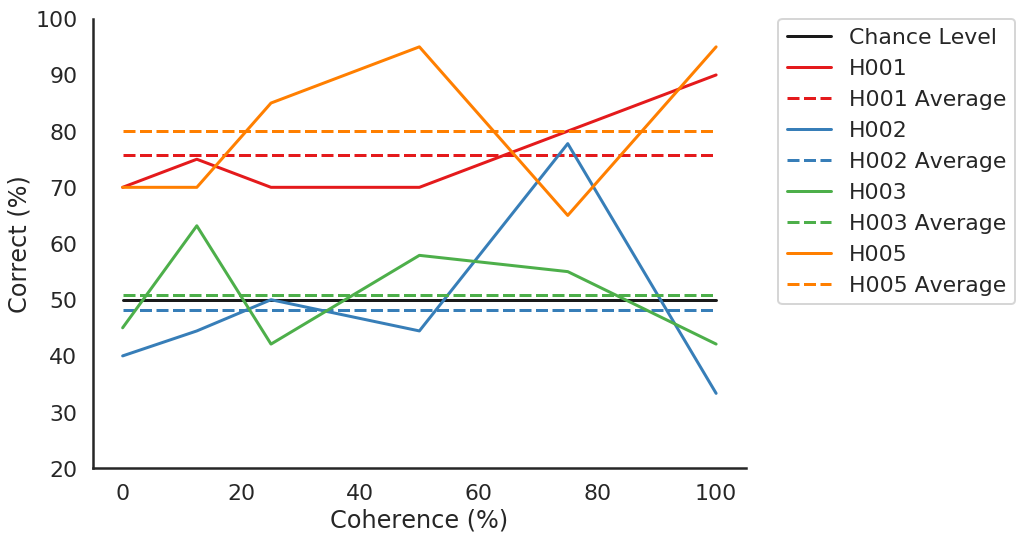

In [16]:
sns.set_context('poster')
kws = [sns.color_palette('Set1')[0],sns.color_palette('Set1')[1],sns.color_palette('Set1')[2],sns.color_palette('Set1')[4]]
sns.lineplot([0,12.5,25,50,75,100],[50,50,50,50,50,50],color='k',ci=100)

a = sns.lineplot(x='Coherence (%)', y='Correct (%)', hue='Subject', style="Average", data=dots_data, legend= False, palette=kws)#, palette=sns.color_palette());
sns.despine(top=True)
plt.legend(["Chance Level","H001","H001 Average","H002","H002 Average","H003","H003 Average","H005","H005 Average"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
a.set_ylim([20,100]);
#plt.savefig("../plots/behaviour_dots.jpg",bbox_inches='tight')

### Awareness

In [17]:
print("H001 Mean Awareness:", np.round(100*H001_dots.Awareness.mean()))
print("H002 Mean Awareness:", np.round(100*H002_dots.Awareness.mean()))
print("H003 Mean Awareness:", np.round(100*H003_dots.Awareness.mean()))
print("H005 Mean Awareness:", np.round(100*H005_dots.Awareness.mean()))

H001 Mean Awareness: 35.0
H002 Mean Awareness: 0.0
H003 Mean Awareness: 1.0
H005 Mean Awareness: 4.0


## Objects, Faces

### Significance Testing

H001 did not finish this task

H002

In [18]:
chance = np.concatenate((np.zeros(math.floor(len(H002_faces.Correct)/2)),np.ones(math.ceil(len(H002_faces.Correct)/2))))

stat, p = wilcoxon(H002_faces.Correct, chance)
print(stat, p)

56.0 0.7962534147376392


H003

In [19]:
chance = np.concatenate((np.zeros(math.floor(len(H003_faces.Correct)/2)),np.ones(math.ceil(len(H003_faces.Correct)/2))))

stat, p = wilcoxon(H003_faces.Correct, chance)
print(stat, p)

15.0 5.337263600339065e-07


H004

In [20]:
chance = np.concatenate((np.zeros(math.floor(len(H004_faces.Correct)/2)),np.ones(math.ceil(len(H004_faces.Correct)/2))))

stat, p = wilcoxon(H004_faces.Correct, chance)
print(stat, p)

76.0 0.6373518882339371


H005

In [21]:
chance = np.concatenate((np.zeros(math.floor(len(H005_faces.Correct)/2)),np.ones(math.ceil(len(H005_faces.Correct)/2))))

stat, p = wilcoxon(H005_faces.Correct, chance)
print(stat, p)

64.0 3.6131125499798315e-05




### Means of Performance and Awareness

In [22]:
print("H001 did not finish")
print("H002 Percentage Correct:", np.round(100*H002_faces.Correct.mean()), "Mean Awareness:", np.round(100*H002_faces.Awareness.mean()))
print("H003 Percentage Correct:", np.round(100*H003_faces.Correct.mean()), "Mean Awareness:", np.round(100*H003_faces.Awareness.mean()))
print("H004 Percentage Correct:", np.round(100*H004_faces.Correct.mean()), "Mean Awareness:", np.round(100*H004_faces.Awareness.mean()))
print("H005 Percentage Correct:", np.round(100*H005_faces.Correct.mean()), "Mean Awareness:", np.round(100*H005_faces.Awareness.mean()))

H001 did not finish
H002 Percentage Correct: 55.0 Mean Awareness: 0.0
H003 Percentage Correct: 98.0 Mean Awareness: 89.0
H004 Percentage Correct: 46.0 Mean Awareness: 0.0
H005 Percentage Correct: 86.0 Mean Awareness: 0.0


## Average

In [23]:
averages = [["H001","Gabor",100*np.mean(H001_gabor.Correct),100*H001_gabor.Awareness.mean()],["H002","Gabor",100*np.mean(H002_gabor.Correct),100*H002_gabor.Awareness.mean()],["H003","Gabor",100*np.mean(H003_gabor.Correct),100*H003_gabor.Awareness.mean()],["H004","Gabor",100*np.mean(H004_gabor.Correct),100*H004_gabor.Awareness.mean()],["H005","Gabor",100*np.mean(H005_gabor.Correct),100*H005_gabor.Awareness.mean()],
            ["H001","Motion",100*np.mean(H001_dots.Correct),100*H001_dots.Awareness.mean()],["H002","Motion",100*np.mean(H002_dots.Correct),100*H002_dots.Awareness.mean()],["H003","Motion",100*np.mean(H003_dots.Correct),100*H003_dots.Awareness.mean()],["H005","Motion",100*np.mean(H005_dots.Correct),100*H005_dots.Awareness.mean()],
            ["H001","Objects",100*np.mean(H001_faces.Correct),100*H001_faces.Awareness.mean()],["H002","Objects",100*np.mean(H002_faces.Correct),100*H002_faces.Awareness.mean()],["H003","Objects",100*np.mean(H003_faces.Correct),100*H003_faces.Awareness.mean()],["H004","Objects",100*np.mean(H004_faces.Correct),100*H004_faces.Awareness.mean()],["H005","Objects",100*np.mean(H005_faces.Correct),100*H005_faces.Awareness.mean()]]

average_data = pd.DataFrame(averages, columns=["Subject","Condition","Correct (%)", "Awareness (%)"])

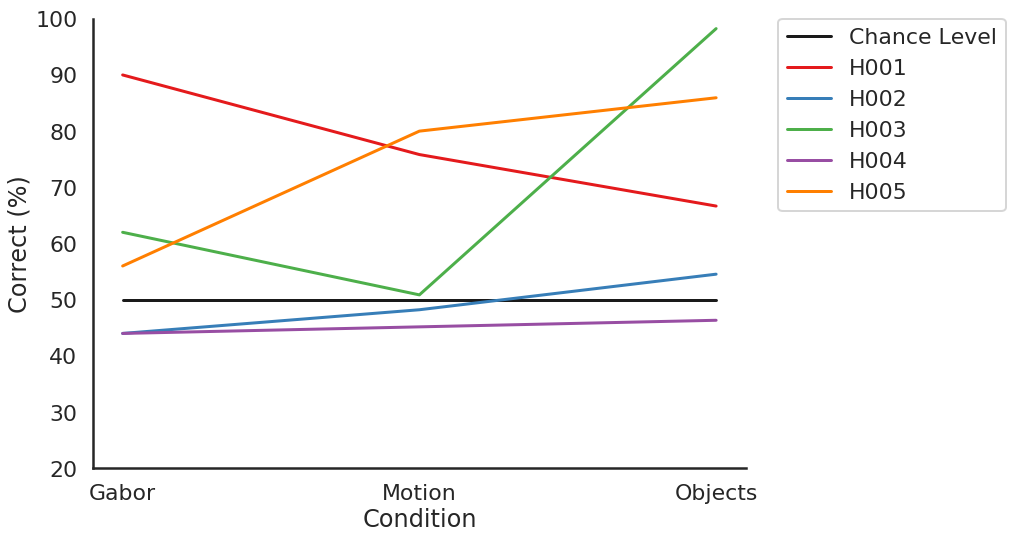

In [24]:
sns.set_context('poster')
sns.lineplot(["Gabor","Motion","Objects"],[50,50,50],color='k')

a = sns.lineplot(x='Condition', y='Correct (%)', hue='Subject', data=average_data, legend=None, palette=sns.color_palette('Set1',n_colors=5));
sns.despine(top=True)
plt.legend(["Chance Level","H001","H002","H003","H004","H005"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
a.set_ylim([20,100]);
#plt.savefig("../plots/behaviour_average.jpg",bbox_inches='tight')

In [25]:
average_data

Subject Condition  Correct (%)  Awareness (%)
0     H001     Gabor    90.000000      80.000000
1     H002     Gabor    44.000000       8.000000
2     H003     Gabor    62.000000      34.000000
3     H004     Gabor    44.000000       0.000000
4     H005     Gabor    56.000000       0.000000
5     H001    Motion    75.833333      35.000000
6     H002    Motion    48.214286       0.000000
7     H003    Motion    50.862069       0.869565
8     H005    Motion    80.000000       4.166667
9     H001   Objects    66.666667      50.000000
10    H002   Objects    54.545455       0.000000
11    H003   Objects    98.245614      89.285714
12    H004   Objects    46.341463       0.000000
13    H005   Objects    85.937500       0.000000

### Awareness

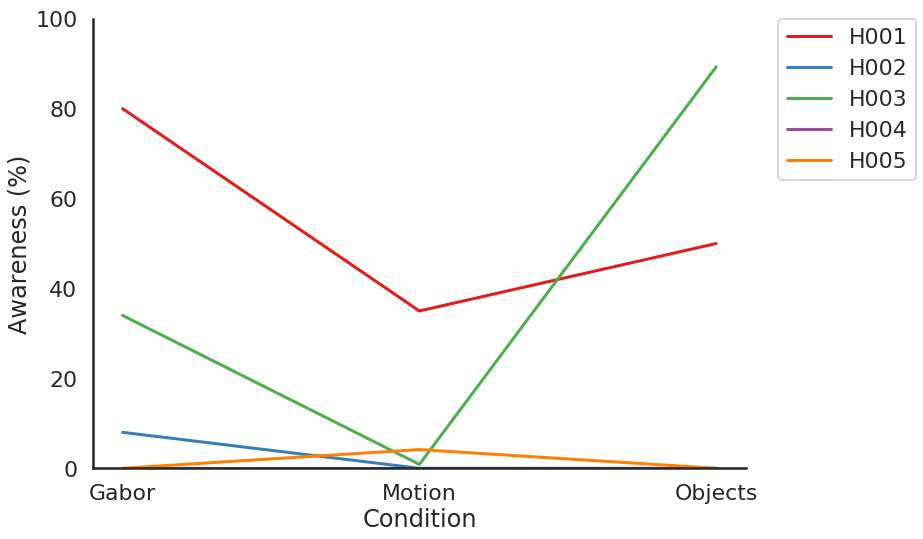

In [26]:
sns.set_context('poster')

a = sns.lineplot(x='Condition', y='Awareness (%)', hue='Subject', data=average_data, legend=None, palette=sns.color_palette('Set1',n_colors=5));
sns.despine(top=True)
plt.legend(["H001","H002","H003","H004","H005"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
a.set_ylim([0,100]);
#plt.savefig("../plots/behaviour_average_awareness.jpg",bbox_inches='tight')